In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Timeseries objects in python

In [24]:
import datetime

Create a date range. Frequency alias are shown here: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [29]:
y = pd.Series(pd.date_range('2012', periods = 5, freq= 'YS'))

In [30]:
z = pd.Series([123,39,78,52,110])

In [32]:
y = pd.concat([y, z], axis = 1)

In [33]:
y.columns = ['Year', 'Observation']

In [35]:
y.head()

,Year,Observation
0,2012-01-01,123
1,2013-01-01,39
2,2014-01-01,78
3,2015-01-01,52
4,2016-01-01,110


## 2.2 Creating time plots

Datasets can be found here:
https://cran.r-project.org/web/packages/fpp/fpp.pdf

Datasets not located in the above link were extracted from fpp-package. 

In [119]:
melsyd = pd.read_csv("..\data\melsyd.csv")
melsyd.head()

,index,first_class,business_class,economy_class
0,1987-07-05,1.912,NaN,20.167
1,1987-07-12,1.848,NaN,20.161
2,1987-07-19,1.856,NaN,19.993
3,1987-07-26,2.142,NaN,20.986
4,1987-08-02,2.118,NaN,20.497


In [120]:
melsyd.columns

Index(['index', 'first_class', 'business_class', 'economy_class'], dtype='object')

To get into useful form in pandas, the date index needs to be converted to a datetime object then reindexed

In [121]:
melsyd['index'] = pd.to_datetime(melsyd['index'])

In [122]:
melsyd.set_index('index', inplace = True)

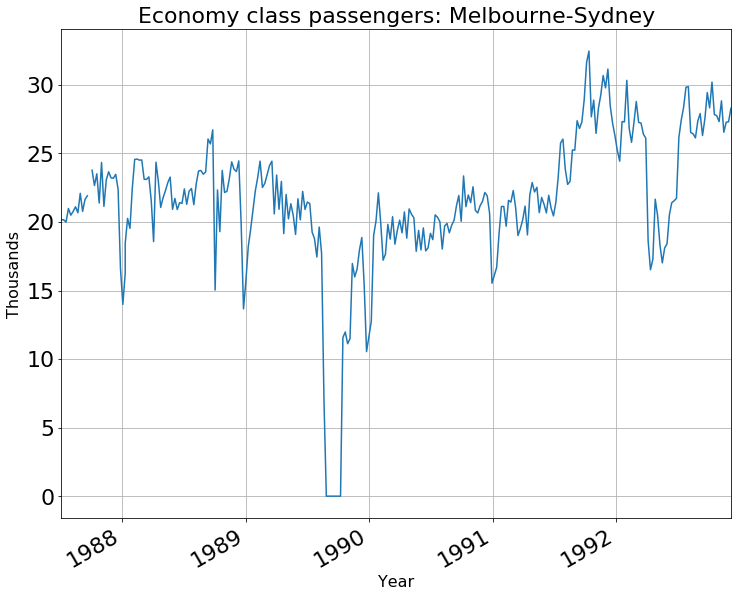

In [133]:
melsyd['economy_class'].plot(figsize = (12,10))

plt.xlabel("Year", fontsize=16)
plt.ylabel("Thousands", fontsize=16)
plt.title("Economy class passengers: Melbourne-Sydney", fontsize=22)
plt.grid(True)

Interesting features:
* Period in 1989 when no passengers were carried. Due to an industrial dispute
* Reduced load in 1992. When some economy class seats were replaced by business class seats
* Large increase in passenger load occured in second half of 1992
* Long term fluctuation in level of the series with increases in 1987, decreases in 1989 and increases again through 1990 and 1991. 
* Some periods of missing observations

In [205]:
a10 = pd.read_csv(r"..\data\a10.csv")

In [206]:
a10.head()

,index,value
0,1991 Jul,3.526591
1,1991 Aug,3.180891
2,1991 Sep,3.252221
3,1991 Oct,3.611003
4,1991 Nov,3.565869


In [207]:
a10['index'] = pd.to_datetime(a10['index'])

In [208]:
a10.set_index('index', inplace = True)

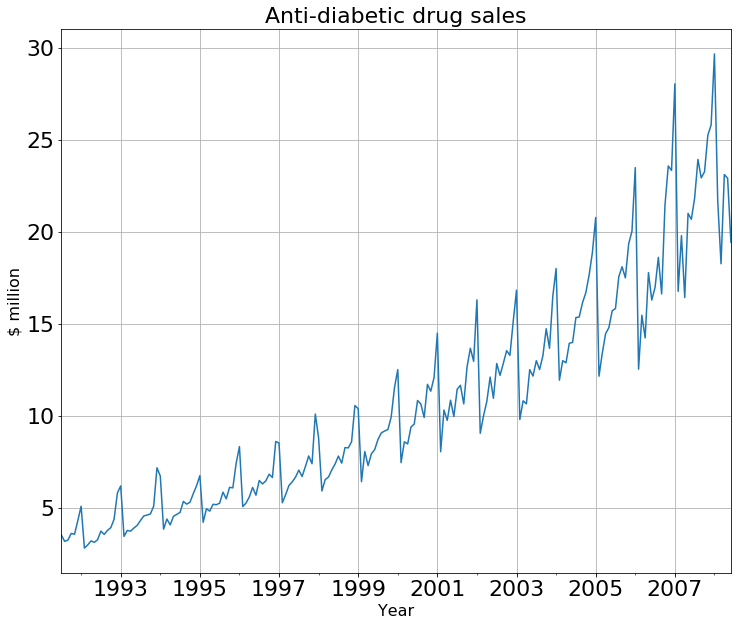

In [209]:
a10.plot(figsize = (12,10), legend=None)

plt.xlabel("Year", fontsize=16)
plt.ylabel("$ million", fontsize=16)
plt.title("Anti-diabetic drug sales", fontsize=22)
plt.grid(True)

Interesting features:
* Clear increasing trend
* Strong seasonal pattern that is increasing in size as the level of the series increases
* Large drop at the end of the calendar year

Any forecast needs to capture seasonal pattern and the fact the trend is slowly changing.

## 2.3 Time Series Patterns

Different patterns:
* Trend - a long term increase or decrease in data. Doesn't need to be linear
* Seasonal - seasonal factors influence the data. It is always of a fixed and known frequency. 
* Cyclic - exhibit rise and falls that are not of a fixed frequency. A trend can be a cyclic.

## 2.4 Seasonal plots

In [210]:
a10['year'], a10['month'] = a10.index.year, a10.index.month
a10_grouped = a10.groupby(['month','year'])[['value']].sum()

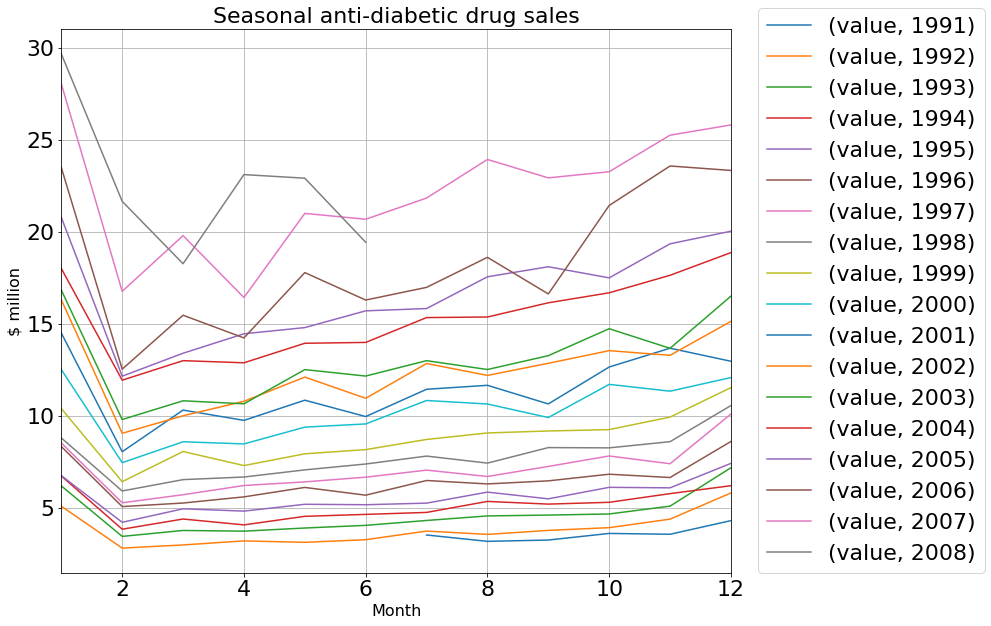

In [212]:
a10_grouped.unstack().plot(figsize = (12,10), legend=True)

plt.legend(loc=(1.04,0))
plt.xlabel("Month", fontsize=16)
plt.ylabel("$ million", fontsize=16)
plt.title("Seasonal anti-diabetic drug sales", fontsize=22)
plt.grid(True)

Interesting features:
* Large increase in sales at beginning of year. 
* Small amount of sales in Feb and March

In [254]:
## Need to add seasonal polar/radar chart

In [255]:
## Need to add seasonal subseries plot

## Scatterplots

In [257]:
elecdemand = pd.read_csv(r"..\data\elecdemand.csv")
elecdemand['index'] = pd.to_datetime(elecdemand['index'])
elecdemand.set_index('index', inplace = True)

In [258]:
elecdemand.head()

,Demand,WorkDay,Temperature
index,,,
2014-01-01 00:00:00+00:00,3.914647,0,18.2
2014-01-01 00:30:00+00:00,3.672550,0,17.9
2014-01-01 01:00:00+00:00,3.497539,0,17.6
2014-01-01 01:30:00+00:00,3.339145,0,16.8
2014-01-01 02:00:00+00:00,3.204313,0,16.3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001594869C278>,
      dtype=object)

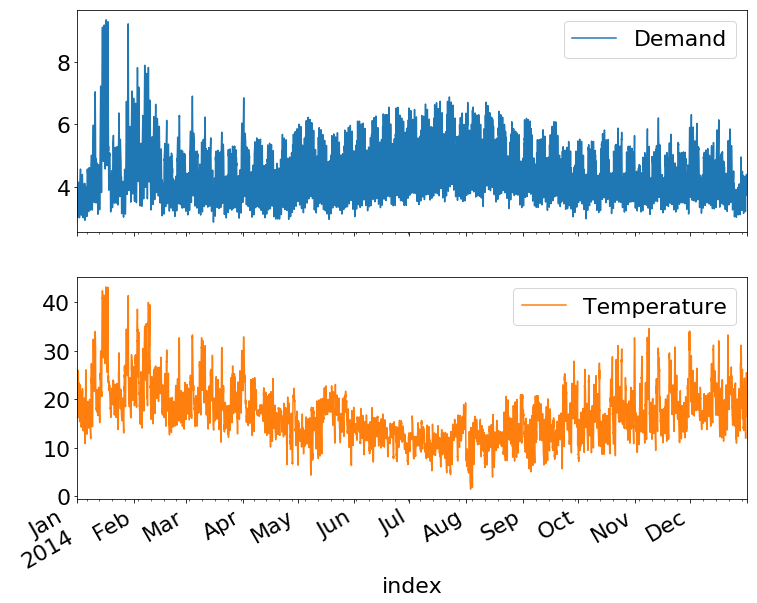

In [262]:
elecdemand[['Demand', 'Temperature']].plot(figsize = (12,10), subplots =True)

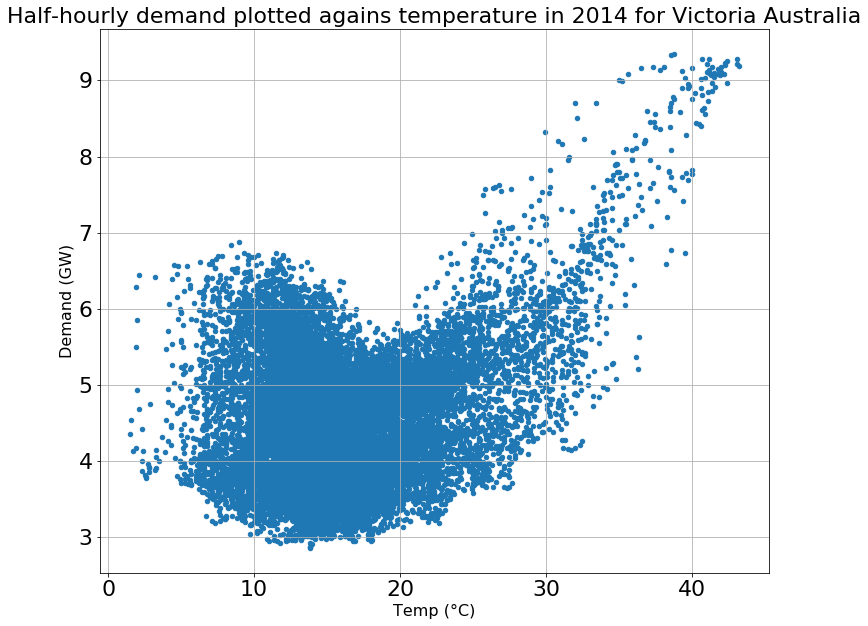

In [267]:
elecdemand.plot(x = 'Temperature', y = 'Demand',  kind = 'scatter', figsize = (12,10))


plt.xlabel("Temp (°C)", fontsize=16)
plt.ylabel("Demand (GW)", fontsize=16)
plt.title("Half-hourly demand plotted agains temperature in 2014 for Victoria Australia", fontsize=22)
plt.grid(True)

Interesting features:
* High demand occurs when temperatures are high due to a/c. 
* Demand also increases when temperatures are very low due to heating. 

Plot scatterplot matrix to visualize relationship between each of the series

In [280]:
elecdemand = pd.read_csv(r"..\data\visnights.csv")
elecdemand['index'] = elecdemand['index'].str.replace(" ", "-")
elecdemand['index'] = pd.to_datetime(elecdemand['index'])
elecdemand.set_index('index', inplace = True)

In [281]:
elecdemand.head()

,NSWMetro,NSWNthCo,NSWSthCo,NSWSthIn,NSWNthIn,QLDMetro,QLDCntrl,QLDNthCo,SAUMetro,SAUCoast,SAUInner,VICMetro,VICWstCo,VICEstCo,VICInner,WAUMetro,WAUCoast,WAUInner,OTHMetro,OTHNoMet
index,,,,,,,,,,,,,,,,,,,,
1998-01-01,9.047095,8.565678,5.818029,2.679538,2.977507,12.106052,2.748374,2.137234,2.881372,2.591997,0.894877,7.490382,2.442005,3.381972,5.326655,3.075779,3.066555,0.694995,3.437924,2.073469
1998-04-01,6.962126,7.124468,2.466437,3.010732,3.477703,7.786687,4.040915,2.269596,2.124736,1.375780,0.979251,5.198178,0.960505,1.827940,4.441119,2.154929,3.334405,0.557680,2.677081,1.787939
1998-07-01,6.871963,4.716893,1.928053,3.328869,3.014770,11.380024,5.343964,4.890227,2.284870,1.079542,0.980329,5.244217,0.755974,1.351952,3.815645,2.787286,4.365844,1.006184,3.793743,2.345021
1998-10-01,7.147293,6.269299,2.797556,2.417772,3.757972,9.311460,4.260419,2.621548,1.785889,1.497664,1.509434,6.274246,1.271604,1.493415,3.859567,2.752910,4.521996,1.172551,3.304231,1.943689
1999-01-01,7.956923,9.493901,4.853681,3.224285,3.790760,12.671942,4.186113,2.483203,2.293873,2.247684,0.963523,9.187422,2.385058,2.896929,4.588755,3.519564,3.579347,0.398183,3.510819,2.165838


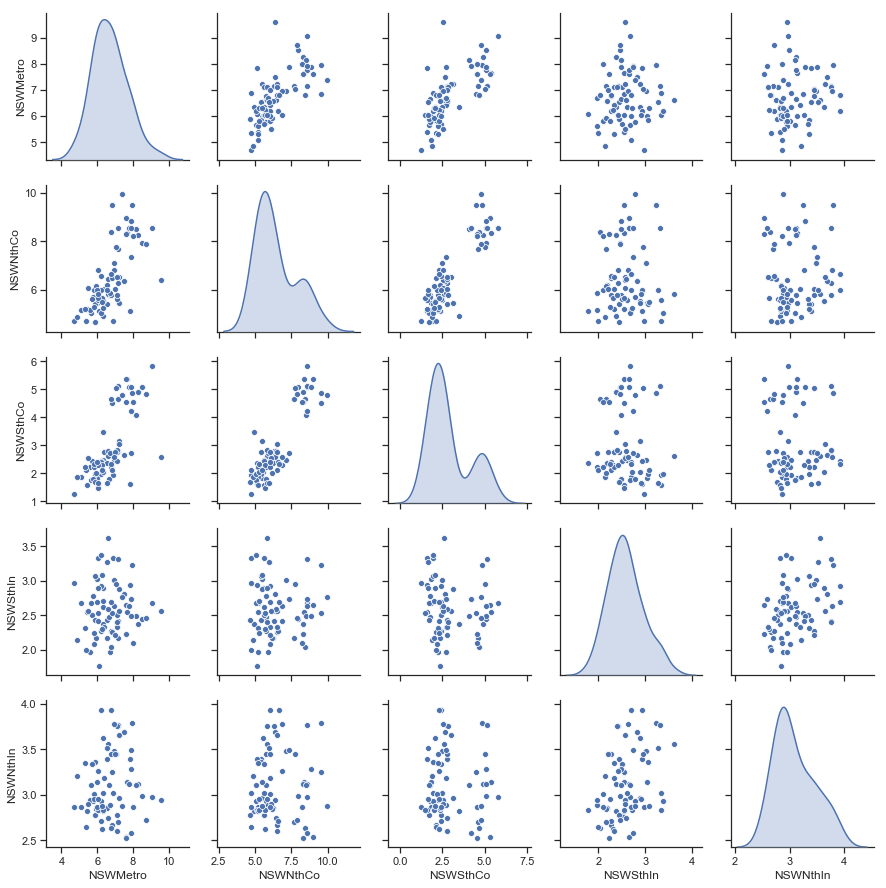

In [298]:
import seaborn as sns
sns.set(style="ticks")

ax = sns.pairplot(elecdemand.iloc[:,0:5], diag_kind="kde")

Interesting features:
* Strong correlation between visitors to the NSW north coast and the NSW south coast
* No detectable relationship between visitors to the NSW north coast and visitors to the NSW south inland 
* A few outliers in NSWMetro related to 2000 Sydney Oympics

## Lag Plots

In [383]:
ausbeer = pd.read_csv(r"..\data\ausbeer.csv")
ausbeer['index'] = ausbeer['index'].str.replace(" ", "-")
ausbeer['index'] = pd.to_datetime(ausbeer['index'])
ausbeer.set_index('index', inplace = True)
ausbeer = ausbeer['1992-1':]

In [384]:
from pandas.plotting import lag_plot

In [385]:
ausbeer['quarter']= ausbeer.index.quarter
ausbeer['year']= ausbeer.index.year

In [386]:
ausbeer.head()

,value,quarter,year
index,,,
1992-01-01,443,1,1992
1992-04-01,410,2,1992
1992-07-01,420,3,1992
1992-10-01,532,4,1992
1993-01-01,433,1,1993


In [394]:
data = ausbeer[ausbeer['quarter'] == 1]['value'].values

In [397]:
y1 = data[:-lag]
y1

array([443, 433, 449, 426, 409, 432, 428, 435, 421], dtype=int64)

In [399]:
y2 = data[lag:]
y2

array([428, 435, 435, 416, 438, 427, 420, 415, 414], dtype=int64)

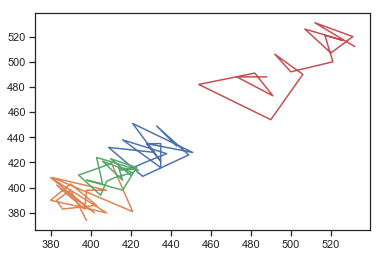

In [389]:
lag = 1
for i in range(1,5):
    data = ausbeer[ausbeer['quarter'] == i]['value'].values
    y1 = data[:-lag]
    y2 = data[lag:]
    plt.plot(y1, y2)

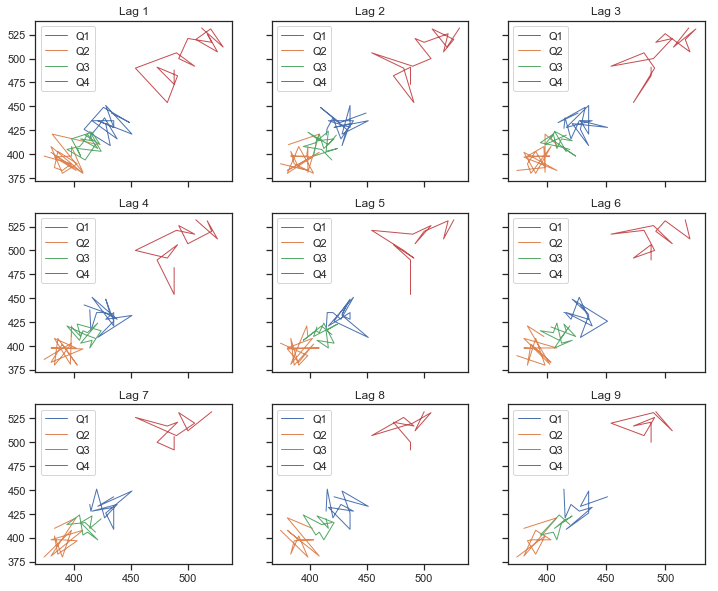

In [408]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize = (12,10))
lag = 1



for i in range(3):
    for j in range(3):
        for k in range(1,5):
            data = ausbeer[ausbeer['quarter'] == k]['value'].values
            y1 = data[lag:]
            y2 = data[:-lag]
            ax[i,j].plot(y1, y2, lw=1, label='Q{}'.format(k))
            ax[i,j].set_title("Lag {}".format(lag))
            ax[i,j].legend()
            
        lag +=1

        

In [400]:
## Different from lagplot in text. Figure out why